# Dado1

In [1]:
from os import sep
import pandas as pd
import random
import numpy as np
from google.colab import files

In [ ]:
files.upload()

{}

In [2]:
#Dado1
filename_data1 = '/content/data1.csv'
data1 = pd.read_csv(filename_data1)

In [3]:
#medidas de posição
media = data1.mean()
mediana = data1.median()
moda = data1.mode()
minino = data1.min()
maximo = data1.max()
print("média:", str(media), "\n",
      "mediana:", str(mediana), "\n",
      "moda:", str(moda), "\n",
      "minino:", str(minino), "\n",
      "maximo:", str(maximo), "\n"
)

média: valores    8.987255
dtype: float64 
 mediana: valores    8.987193
dtype: float64 
 moda:          valores
0      -0.016023
1       0.525653
2       0.920446
3       0.936869
4       1.094549
...          ...
99995  17.465660
99996  17.541291
99997  17.549132
99998  17.620575
99999  18.264037

[100000 rows x 1 columns] 
 minino: valores   -0.016023
dtype: float64 
 maximo: valores    18.264037
dtype: float64 



In [4]:
#medidas de dispensão
desvio_padrao = data1.std()
variancia = data1.var()
print("desvio padrão:", str(desvio_padrao), "\n",
      "variancia:", str(mediana), "\n"
)

desvio padrão: valores    2.002652
dtype: float64 
 variancia: valores    8.987193
dtype: float64 



In [5]:
#coeficiente de assimetria
assimetria = data1.skew()
print(assimetria)

valores    0.001163
dtype: float64


In [6]:
### Plots
## Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='valores'>

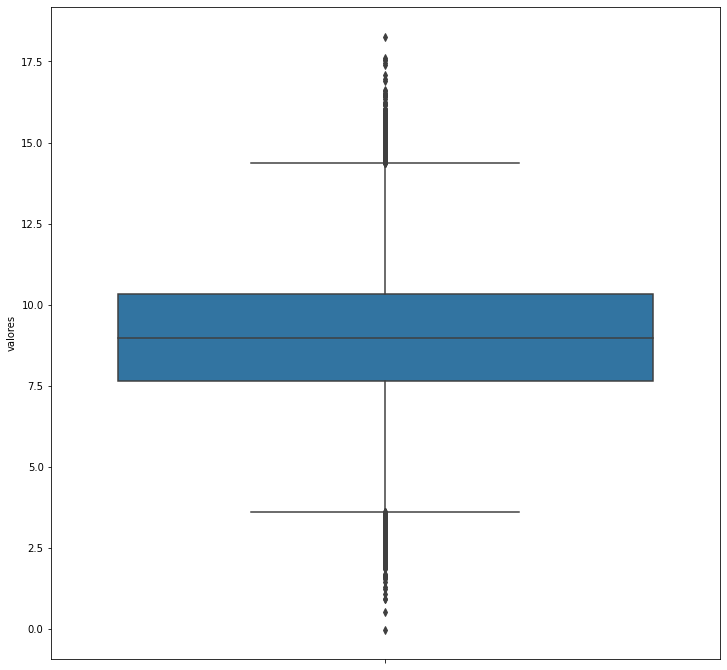

In [7]:
plt.rcParams['figure.figsize'] = [12, 12]

sns.boxplot(y=data1["valores"])

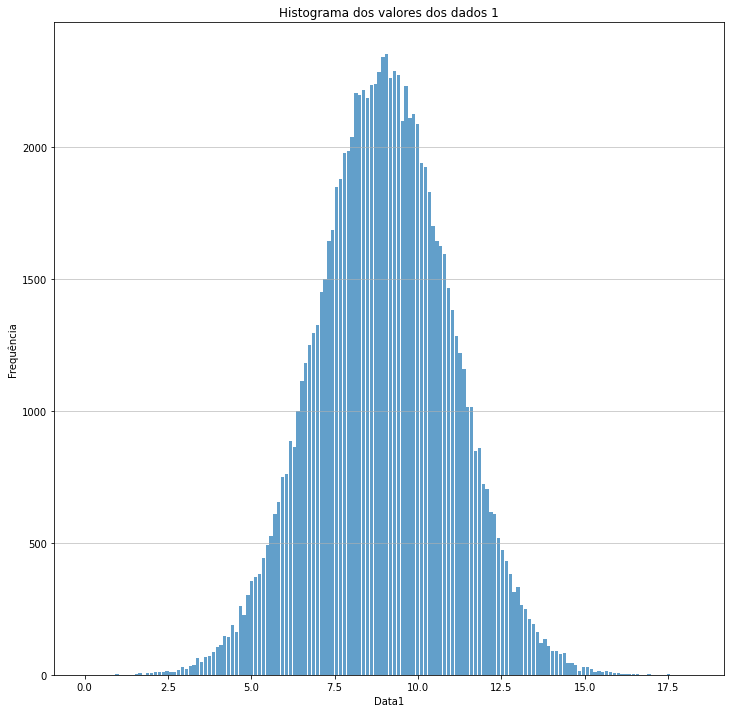

In [8]:
## Histograma
plt.hist(data1["valores"], bins='auto',
            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Data1')
plt.ylabel('Frequência')
plt.title('Histograma dos valores dos dados 1')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

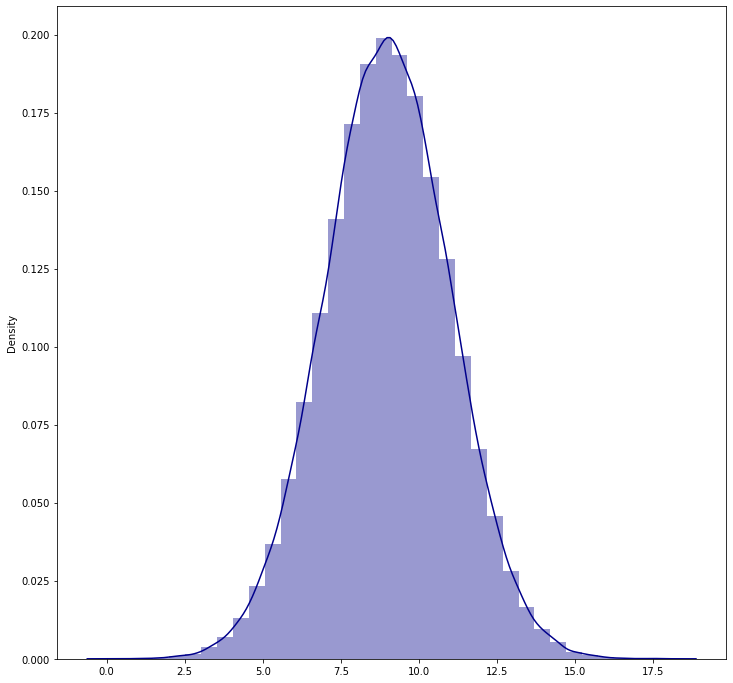

In [9]:
sns.distplot(data1, hist=True, 
             bins=int(180/5), 
             color = 'darkblue')

In [10]:
# Remover outlier
q = data1["valores"].quantile(0.99)

data1_sem_outlier = data1[data1["valores"] < q]
data1[data1['valores']==728]
data1_sem_outlier[data1_sem_outlier['valores']==728]

,valores


In [11]:
### Avaliando diferentes distribuições
from scipy.stats import kstest
import scipy.stats as st

In [12]:
# Normal
stat, p_val = kstest(data1_sem_outlier['valores'], 'norm', st.norm.fit(data1_sem_outlier)) 
print(f'Statistic: \t{stat} \nP-Value: \t{p_val}\n')

Statistic: 	0.009146194975577004 
P-Value: 	1.2732895302308867e-07



In [13]:
# Exponential
stat, p_val = kstest(data1_sem_outlier['valores'], 'expon', st.expon.fit(data1_sem_outlier)) 
print(f'Statistic: \t{stat} \nP-Value: \t{p_val}\n')

Statistic: 	0.42167114403588113 
P-Value: 	0.0



In [14]:
# LogNormal
stat, p_val = kstest(data1_sem_outlier['valores'], "lognorm", st.lognorm.fit(data1_sem_outlier))
print(f'Statistic: \t{stat} \nP-Value: \t{p_val}\n')

Statistic: 	0.009786720760546874 
P-Value: 	1.1531776559435923e-08



In [15]:
def teste_hipotese(dadoArray, dist, dado):
  if(dist == 'norm'):
    stat, p_val = kstest(dadoArray, 'norm', st.norm.fit(dado))
  elif(dist == 'expon'):
     stat, p_val = kstest(dadoArray, 'expon', st.expon.fit(dado))
  elif(dist == 'lognorm'):
    stat, p_val = kstest(dadoArray, 'lognorm', st.lognorm.fit(dado))
  return f'Statistic: \t{stat} \nP-Value: \t{p_val}\n'

In [16]:
teste_hipotese(data1_sem_outlier['valores'], 'norm', data1_sem_outlier )

'Statistic: \t0.009146194975577004 \nP-Value: \t1.2732895302308867e-07\n'

In [17]:
def teste_hipotese_todos(dadoArray, dado):
  norm = p_val = kstest(dadoArray, 'norm', st.norm.fit(dado))
  expon = p_val = kstest(dadoArray, 'expon', st.expon.fit(dado))
  lognorm = p_val = kstest(dadoArray, 'lognorm', st.lognorm.fit(dado))
  return f'\norm-nP-Value: \t{norm}\n \expon-nP-Value: \t{expon}\n \lognorm-nP-Value: \t{lognorm}\n'

In [18]:
print(teste_hipotese_todos(data1_sem_outlier['valores'], data1_sem_outlier ))


orm-nP-Value: 	KstestResult(statistic=0.009146194975577004, pvalue=1.2732895302308867e-07, statistic_location=9.849912925380531, statistic_sign=-1)
 \expon-nP-Value: 	KstestResult(statistic=0.42167114403588113, pvalue=0.0, statistic_location=5.904765239553074, statistic_sign=-1)
 \lognorm-nP-Value: 	KstestResult(statistic=0.009786720760546874, pvalue=1.1531776559435923e-08, statistic_location=9.599964828897944, statistic_sign=-1)



# Dado2

In [20]:
#Dado2
filename_data2 = '/content/data2.csv'
data2 = pd.read_csv(filename_data2)

In [21]:
#medidas de posição
media = data2.mean()
mediana = data2.median()
moda = data2.mode()
minino = data2.min()
maximo = data2.max()
print("média:", str(media), "\n",
      "mediana:", str(mediana), "\n",
      "moda:", str(moda), "\n",
      "minino:", str(minino), "\n",
      "maximo:", str(maximo), "\n"
)

média: valores    11.001963
dtype: float64 
 mediana: valores    10.692913
dtype: float64 
 moda:          valores
0      10.000000
1      10.000007
2      10.000008
3      10.000028
4      10.000041
...          ...
99995  21.311255
99996  22.164814
99997  22.196457
99998  22.215119
99999  22.812852

[100000 rows x 1 columns] 
 minino: valores    10.0
dtype: float64 
 maximo: valores    22.812852
dtype: float64 



In [22]:
#medidas de dispensão
desvio_padrao = data2.std()
variancia = data2.var()
print("desvio padrão:", str(desvio_padrao), "\n",
      "variancia:", str(mediana), "\n"
)

desvio padrão: valores    1.001969
dtype: float64 
 variancia: valores    10.692913
dtype: float64 



In [23]:
#coeficiente de assimetria
assimetria = data2.skew()
print(assimetria)

valores    2.025278
dtype: float64


<AxesSubplot:ylabel='valores'>

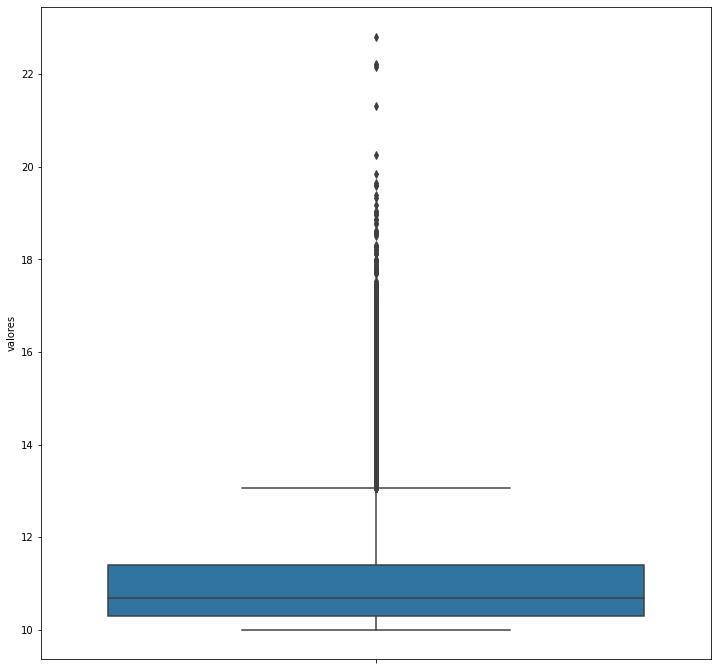

In [41]:
plt.rcParams['figure.figsize'] = [12, 12]

sns.boxplot(y=data2["valores"])

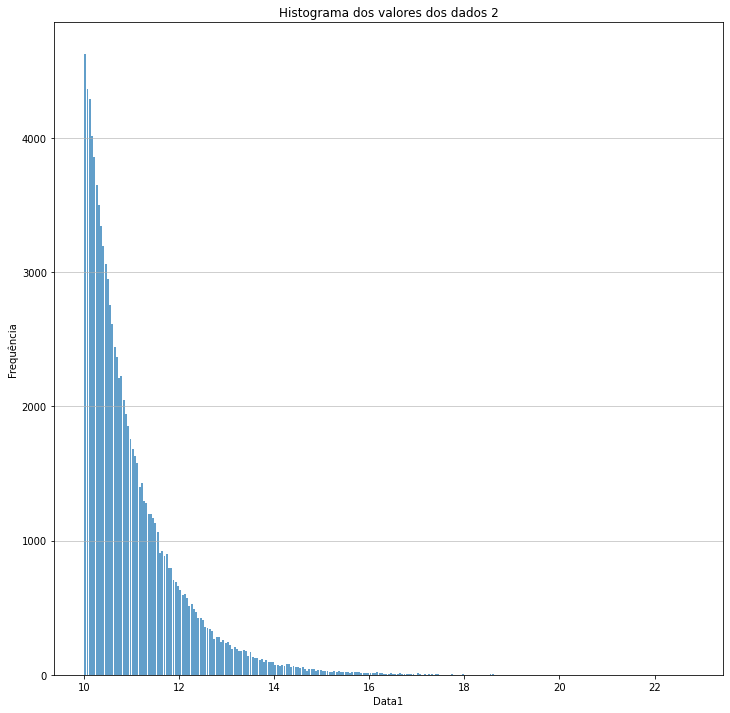

In [34]:
## Histograma
plt.hist(data2["valores"], bins='auto',
            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Data2')
plt.ylabel('Frequência')
plt.title('Histograma dos valores dos dados 2')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

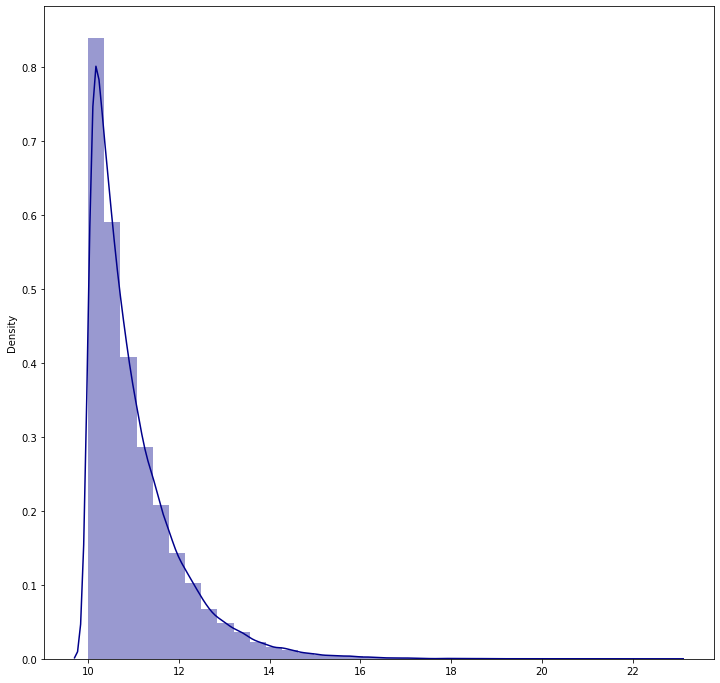

In [35]:
sns.distplot(data2, hist=True, 
             bins=int(180/5), 
             color = 'darkblue')

In [49]:
# Remover outlier
q = data2["valores"].quantile(0.99)

data2_sem_outlier = data2[data2["valores"] < q]
data2[data2['valores']==728]
data2_sem_outlier[data2_sem_outlier['valores']==728]

,valores


In [50]:
print(teste_hipotese_todos(data2_sem_outlier['valores'], data2_sem_outlier ))


orm-nP-Value: 	KstestResult(statistic=0.14031873762128527, pvalue=0.0, statistic_location=10.00000040734025, statistic_sign=-1)
 \expon-nP-Value: 	KstestResult(statistic=0.012266753935829211, pvalue=2.279467334657018e-13, statistic_location=11.027013830503549, statistic_sign=-1)
 \lognorm-nP-Value: 	KstestResult(statistic=0.03874950903949648, pvalue=1.3502968980246459e-129, statistic_location=10.980772494146372, statistic_sign=-1)



# Dado 3

In [51]:
#Dado3
filename_data3 = '/content/data3.csv'
data3 = pd.read_csv(filename_data3)

In [52]:
#medidas de posição
media = data3.mean()
mediana = data3.median()
moda = data3.mode()
minino = data3.min()
maximo = data3.max()
print("média:", str(media), "\n",
      "mediana:", str(mediana), "\n",
      "moda:", str(moda), "\n",
      "minino:", str(minino), "\n",
      "maximo:", str(maximo), "\n"
)

média: valores    12.99637
dtype: float64 
 mediana: valores    12.986897
dtype: float64 
 moda:          valores
0       8.000096
1       8.000113
2       8.000193
3       8.000549
4       8.000616
...          ...
99995  17.999744
99996  17.999797
99997  17.999856
99998  17.999933
99999  17.999981

[100000 rows x 1 columns] 
 minino: valores    8.000096
dtype: float64 
 maximo: valores    17.999981
dtype: float64 



In [53]:
#medidas de dispensão
desvio_padrao = data3.std()
variancia = data3.var()
print("desvio padrão:", str(desvio_padrao), "\n",
      "variancia:", str(mediana), "\n"
)

desvio padrão: valores    2.889233
dtype: float64 
 variancia: valores    12.986897
dtype: float64 



In [54]:
#coeficiente de assimetria
assimetria = data3.skew()
print(assimetria)

valores    0.007441
dtype: float64


<AxesSubplot:ylabel='valores'>

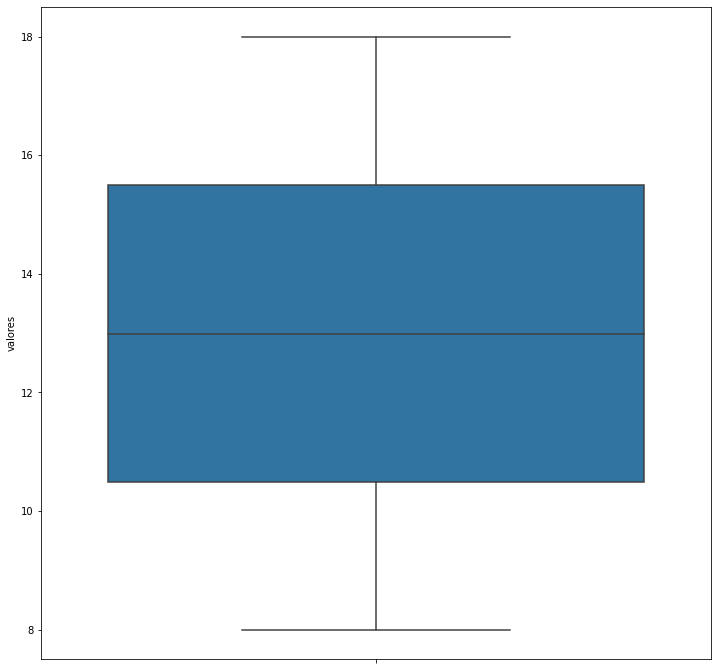

In [56]:
plt.rcParams['figure.figsize'] = [12, 12]

sns.boxplot(y=data3["valores"])

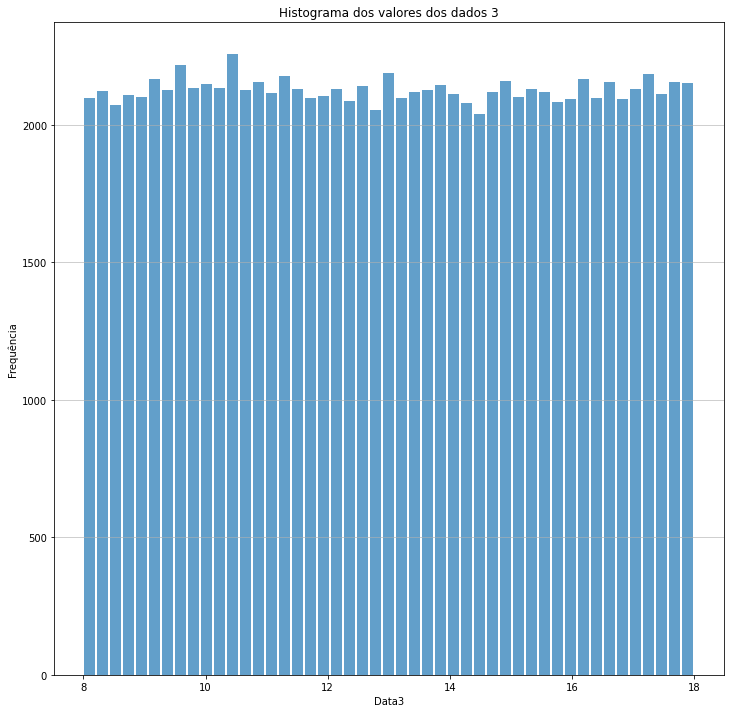

In [57]:
## Histograma
plt.hist(data3["valores"], bins='auto',
            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Data3')
plt.ylabel('Frequência')
plt.title('Histograma dos valores dos dados 3')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

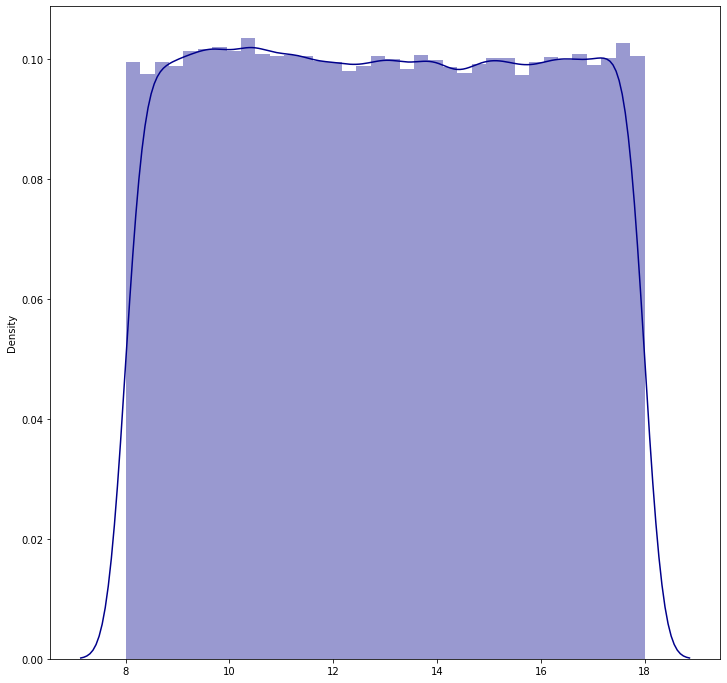

In [58]:
sns.distplot(data3, hist=True, 
             bins=int(180/5), 
             color = 'darkblue')

In [59]:
# Remover outlier
q = data3["valores"].quantile(0.99)

data3_sem_outlier = data3[data3["valores"] < q]
data3[data3['valores']==728]
data3_sem_outlier[data3_sem_outlier['valores']==728]

,valores


In [60]:
print(teste_hipotese_todos(data3_sem_outlier['valores'], data3_sem_outlier ))


orm-nP-Value: 	KstestResult(statistic=0.058325649033274474, pvalue=3.423059105083818e-293, statistic_location=10.573586497911233, statistic_sign=1)
 \expon-nP-Value: 	KstestResult(statistic=0.15158186452195493, pvalue=0.0, statistic_location=11.29904475875976, statistic_sign=-1)
 \lognorm-nP-Value: 	KstestResult(statistic=0.05945538415638685, pvalue=1.1869618771085998e-304, statistic_location=15.149296783529431, statistic_sign=-1)



# Dado 4

In [61]:
#Dado4
filename_data4 = '/content/data4.csv'
data4 = pd.read_csv(filename_data4)

In [62]:
#medidas de posição
media = data4.mean()
mediana = data4.median()
moda = data4.mode()
minino = data4.min()
maximo = data4.max()
print("média:", str(media), "\n",
      "mediana:", str(mediana), "\n",
      "moda:", str(moda), "\n",
      "minino:", str(minino), "\n",
      "maximo:", str(maximo), "\n"
)

média: valores    1.567531
dtype: float64 
 mediana: valores    1.001987
dtype: float64 
 moda:          valores
0       0.019546
1       0.020648
2       0.023136
3       0.025058
4       0.026266
...          ...
99995  49.793112
99996  52.485301
99997  53.766335
99998  60.772040
99999  61.666675

[100000 rows x 1 columns] 
 minino: valores    0.019546
dtype: float64 
 maximo: valores    61.666675
dtype: float64 



In [63]:
#medidas de dispensão
desvio_padrao = data4.std()
variancia = data4.var()
print("desvio padrão:", str(desvio_padrao), "\n",
      "variancia:", str(mediana), "\n"
)

desvio padrão: valores    1.899995
dtype: float64 
 variancia: valores    1.001987
dtype: float64 



In [64]:
#coeficiente de assimetria
assimetria = data4.skew()
print(assimetria)

valores    5.472745
dtype: float64


<AxesSubplot:ylabel='valores'>

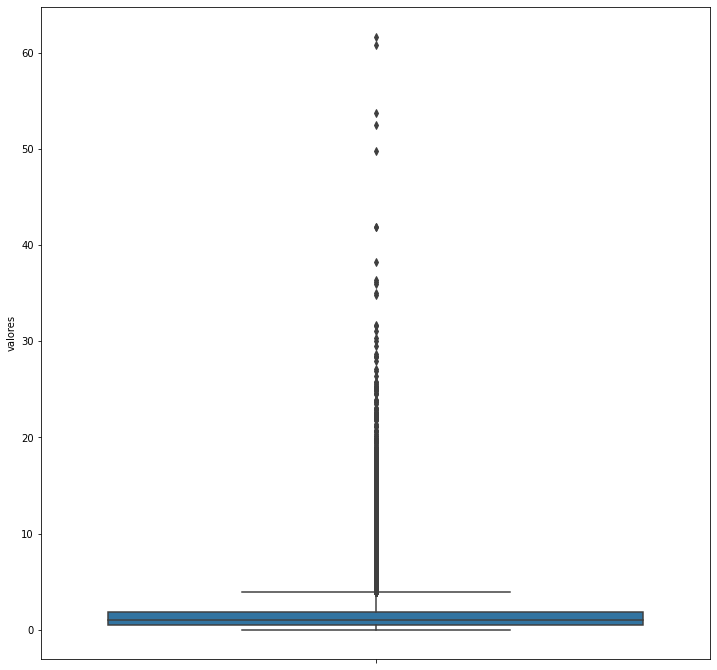

In [65]:
plt.rcParams['figure.figsize'] = [12, 12]

sns.boxplot(y=data4["valores"])

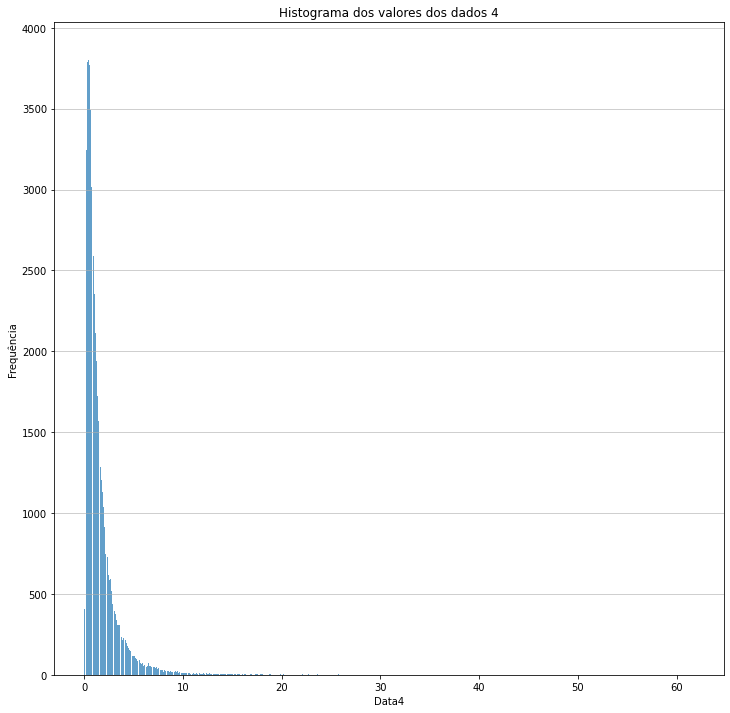

In [66]:
## Histograma
plt.hist(data4["valores"], bins='auto',
            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Data4')
plt.ylabel('Frequência')
plt.title('Histograma dos valores dos dados 4')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

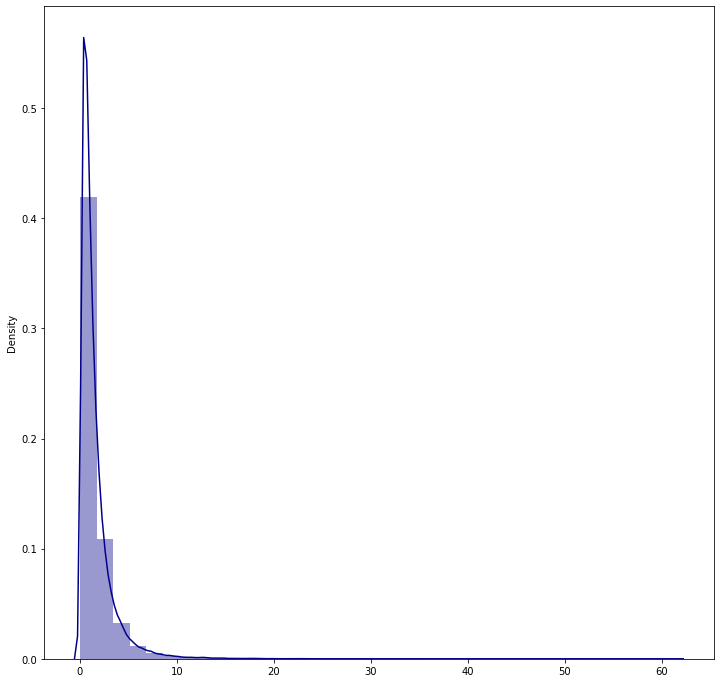

In [67]:
sns.distplot(data4, hist=True, 
             bins=int(180/5), 
             color = 'darkblue')

In [68]:
# Remover outlier
q = data4["valores"].quantile(0.99)

data4_sem_outlier = data4[data4["valores"] < q]
data4[data4['valores']==728]
data4_sem_outlier[data4_sem_outlier['valores']==728]

,valores


In [69]:
print(teste_hipotese_todos(data4_sem_outlier['valores'], data4_sem_outlier ))


orm-nP-Value: 	KstestResult(statistic=0.15938066493993716, pvalue=0.0, statistic_location=0.07559653580949806, statistic_sign=-1)
 \expon-nP-Value: 	KstestResult(statistic=0.07547433774015426, pvalue=0.0, statistic_location=0.2445297848746938, statistic_sign=-1)
 \lognorm-nP-Value: 	KstestResult(statistic=0.008855904487301558, pvalue=3.584246228568558e-07, statistic_location=1.84984226603928, statistic_sign=-1)



# Função hipóteses/aderência

In [157]:
from os import sep
import pandas as pd
import random
import numpy as np
from google.colab import files

### Plots
## Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

### Avaliando diferentes distribuições
from scipy.stats import kstest
import scipy.stats as st

In [158]:
filename_dado1 = '/content/data1.csv'
filename_dado2 = '/content/data2.csv'
filename_dado3 = '/content/data3.csv'
filename_dado4 = '/content/data4.csv'

In [159]:
def dados(caminho_dado, quantile, valor_sem_outlier):
  filename = caminho_dado
  data = pd.read_csv(filename)

  media = data.mean()
  mediana = data.median()
  moda = data.mode()
  minino = data.min()
  maximo = data.max()

  print("------------------------------\n",
        "Medidas de posição: \n\n"
        "média:", str(media), "\n\n",
        "mediana:", str(mediana), "\n\n",
        "moda:", str(moda), "\n\n",
        "minino:", str(minino), "\n\n",
        "maximo:", str(maximo), "\n"
        "------------------------------"
  )

  #medidas de dispensão
  desvio_padrao = data.std()
  variancia = data.var()
  print("------------------------------\n",
        "medidas de dispensão:\n",
        "desvio padrão:", str(desvio_padrao), "\n\n",
        "variancia:", str(mediana), "\n\n",
        "------------------------------\n"
  )

  #coeficiente de assimetria
  assimetria = data.skew()
  print("------------------------------\n",
        "coeficiente de assimetria: \n",
        assimetria, "\n",
        "------------------------------\n"
  )

  # Remover outlier
  q = data["valores"].quantile(quantile)

  data_sem_outlier = data[data["valores"] < q]
  data[data['valores']== valor_sem_outlier]
  data_sem_outlier[data_sem_outlier['valores']== valor_sem_outlier]

  def hipotese():
    # Normal
    stat, p_val_norm = kstest(data_sem_outlier['valores'], 'norm', st.norm.fit(data_sem_outlier)) 

    # Exponential
    stat, p_val_expon = kstest(data_sem_outlier['valores'], 'expon', st.expon.fit(data_sem_outlier))

    # LogNormal
    stat, p_val_lognorm = kstest(data_sem_outlier['valores'], "lognorm", st.lognorm.fit(data_sem_outlier))

    print("------------------------------\n")
    print("Distribuição Normal", p_val_norm, "\n")
    print("Distribuição Exponencial", p_val_expon, "\n")
    print("Distribuição LogNormal", p_val_lognorm, "\n")
    print("------------------------------\n")

    if(p_val_norm < p_val_expon and p_val_norm < p_val_lognorm):
      print("Distribuição Normal é adequado", p_val_norm)
    elif(p_val_expon < p_val_norm and p_val_expon < p_val_lognorm):
      print("Distribuição Exponencial é adequado", p_val_expon)
    elif(p_val_lognorm < p_val_norm and p_val_lognorm < p_val_norm):
      print("Distribuição LogNormal é adequado", p_val_lognorm)
    else:
      print("Valores iguais, verifique o que se adéqua melhor.")

  hipotese()


In [163]:
dados(filename_dado1, 0.99, -1)

------------------------------
 Medidas de posição: 

média: valores    8.987255
dtype: float64 

 mediana: valores    8.987193
dtype: float64 

 moda:          valores
0      -0.016023
1       0.525653
2       0.920446
3       0.936869
4       1.094549
...          ...
99995  17.465660
99996  17.541291
99997  17.549132
99998  17.620575
99999  18.264037

[100000 rows x 1 columns] 

 minino: valores   -0.016023
dtype: float64 

 maximo: valores    18.264037
dtype: float64 
------------------------------
------------------------------
 medidas de dispensão:
 desvio padrão: valores    2.002652
dtype: float64 

 variancia: valores    8.987193
dtype: float64 

 ------------------------------

------------------------------
 coeficiente de assimetria: 
 valores    0.001163
dtype: float64 
 ------------------------------

------------------------------

Distribuição Normal 1.2732895302308867e-07 

Distribuição Exponencial 0.0 

Distribuição LogNormal 1.1531776559435923e-08 

-----------------

In [164]:
dados(filename_dado2, 0.99, -1)

------------------------------
 Medidas de posição: 

média: valores    11.001963
dtype: float64 

 mediana: valores    10.692913
dtype: float64 

 moda:          valores
0      10.000000
1      10.000007
2      10.000008
3      10.000028
4      10.000041
...          ...
99995  21.311255
99996  22.164814
99997  22.196457
99998  22.215119
99999  22.812852

[100000 rows x 1 columns] 

 minino: valores    10.0
dtype: float64 

 maximo: valores    22.812852
dtype: float64 
------------------------------
------------------------------
 medidas de dispensão:
 desvio padrão: valores    1.001969
dtype: float64 

 variancia: valores    10.692913
dtype: float64 

 ------------------------------

------------------------------
 coeficiente de assimetria: 
 valores    2.025278
dtype: float64 
 ------------------------------

------------------------------

Distribuição Normal 0.0 

Distribuição Exponencial 2.279467334657018e-13 

Distribuição LogNormal 1.3502968980246459e-129 

------------------

In [165]:
dados(filename_dado3, 0.99, -1)

------------------------------
 Medidas de posição: 

média: valores    12.99637
dtype: float64 

 mediana: valores    12.986897
dtype: float64 

 moda:          valores
0       8.000096
1       8.000113
2       8.000193
3       8.000549
4       8.000616
...          ...
99995  17.999744
99996  17.999797
99997  17.999856
99998  17.999933
99999  17.999981

[100000 rows x 1 columns] 

 minino: valores    8.000096
dtype: float64 

 maximo: valores    17.999981
dtype: float64 
------------------------------
------------------------------
 medidas de dispensão:
 desvio padrão: valores    2.889233
dtype: float64 

 variancia: valores    12.986897
dtype: float64 

 ------------------------------

------------------------------
 coeficiente de assimetria: 
 valores    0.007441
dtype: float64 
 ------------------------------

------------------------------

Distribuição Normal 3.423059105083818e-293 

Distribuição Exponencial 0.0 

Distribuição LogNormal 1.1869618771085998e-304 

--------------

In [166]:
dados(filename_dado4, 0.99, -1)

------------------------------
 Medidas de posição: 

média: valores    1.567531
dtype: float64 

 mediana: valores    1.001987
dtype: float64 

 moda:          valores
0       0.019546
1       0.020648
2       0.023136
3       0.025058
4       0.026266
...          ...
99995  49.793112
99996  52.485301
99997  53.766335
99998  60.772040
99999  61.666675

[100000 rows x 1 columns] 

 minino: valores    0.019546
dtype: float64 

 maximo: valores    61.666675
dtype: float64 
------------------------------
------------------------------
 medidas de dispensão:
 desvio padrão: valores    1.899995
dtype: float64 

 variancia: valores    1.001987
dtype: float64 

 ------------------------------

------------------------------
 coeficiente de assimetria: 
 valores    5.472745
dtype: float64 
 ------------------------------

------------------------------

Distribuição Normal 0.0 

Distribuição Exponencial 0.0 

Distribuição LogNormal 3.584246228568558e-07 

------------------------------

Valor